In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data and turn project path into a string
path = r'/Users/jerrysiphavong/Desktop/12-2024 Instacart Basket Analysis'

In [3]:
# Import dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_update_1.pkl'))

# Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

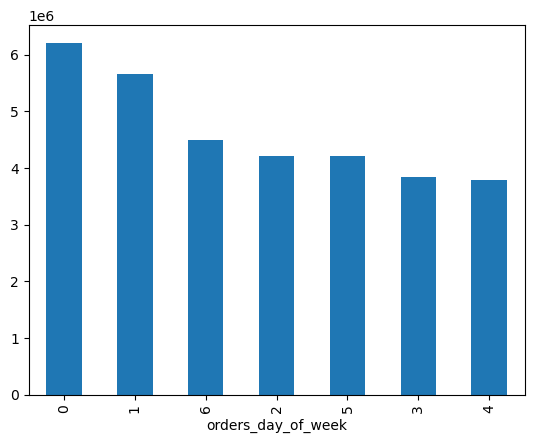

In [5]:
df['orders_day_of_week'].value_counts().plot.bar()

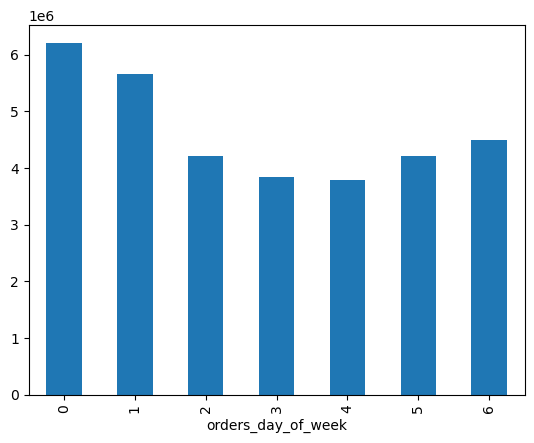

In [6]:
# Use sort_index() 
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

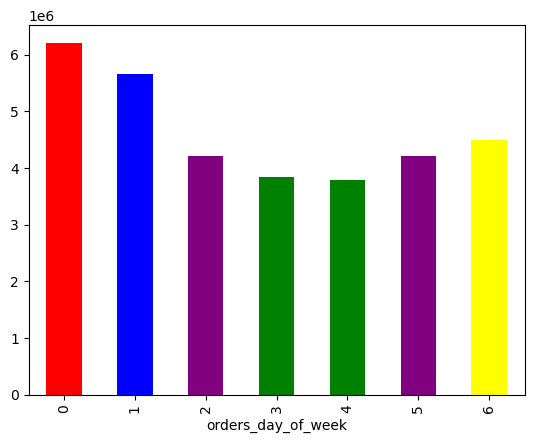

In [7]:
# Adding color attributes
#adding colors
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['red','blue','purple','green','green','purple','yellow'])

In [8]:
# Export chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Create Histograms and Scatterplots

<Axes: ylabel='Frequency'>

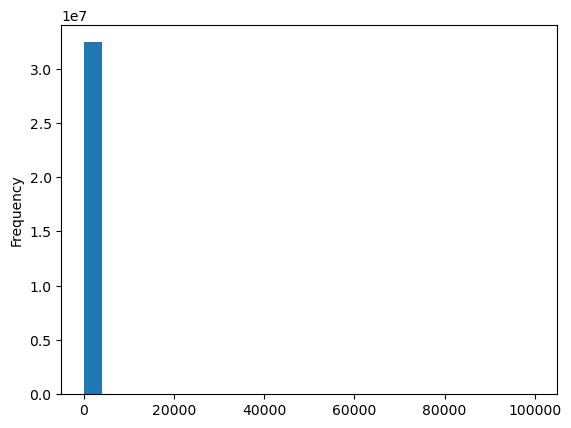

In [10]:
df['prices'].plot.hist(bins = 25)

In [11]:
# Describe 'prices'
df['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

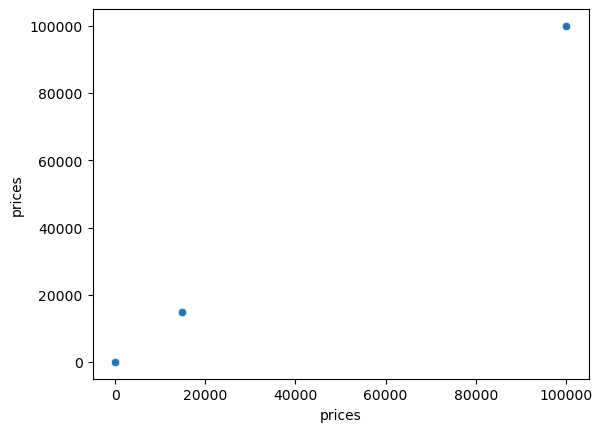

In [12]:
# Create scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [13]:
# Find price over $100
df.loc[df['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,average_spending,spending_flag,order_frequency,order_frequency_flag
13128379,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,2,...,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,108.648299,High spender,5.0,Frequent customer
13128380,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,6,...,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,108.648299,High spender,5.0,Frequent customer
13128381,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,2,...,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,1154.792308,High spender,12.0,Regular customer
13128382,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,0,...,High-range product,Busiest days,Average orders,4,New customer,1154.792308,1154.792308,High spender,12.0,Regular customer
13128383,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,1,...,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21815122,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,0,...,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,1106.743956,High spender,4.0,Frequent customer
21815123,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,0,...,High-range product,Busiest days,Most orders,39,Regular customer,1106.743956,1106.743956,High spender,4.0,Frequent customer
21815124,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,3,...,High-range product,Slowest days,Most orders,15,Regular customer,451.153540,451.153540,High spender,5.0,Frequent customer
21815125,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,3,...,High-range product,Slowest days,Average orders,12,Regular customer,1178.381871,1178.381871,High spender,12.0,Regular customer


In [14]:
# Replace all outliers with missing values
df.loc[df['prices'] >100, 'prices'] = np.nan

In [15]:
# Run max-value on 'prices'
df['prices'].max()

25.0

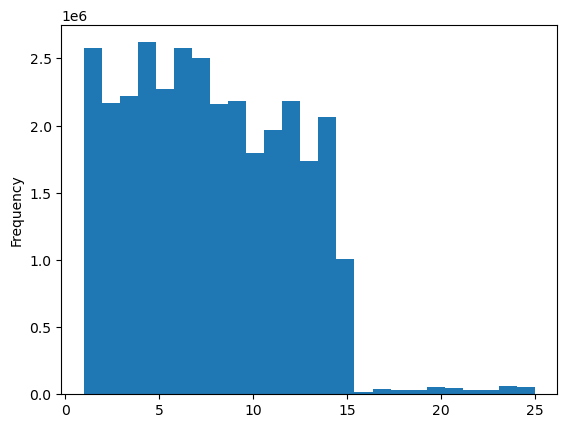

In [16]:
# Create histogram
hist = df['prices'].plot.hist(bins = 25)

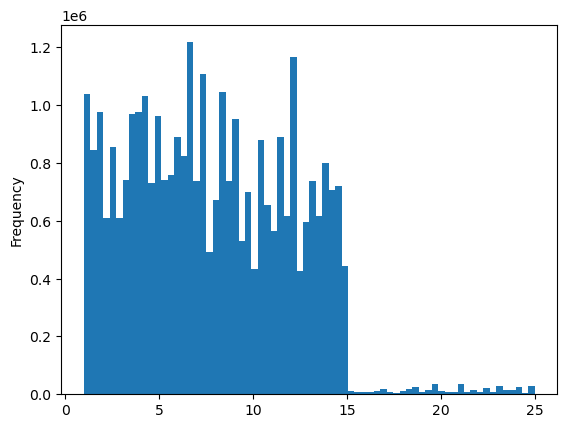

In [17]:
# Create histogram - smaller columns
hist2 = df['prices'].plot.hist(bins = 70)

In [18]:
# Export and save
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_prices.png'))

# Sample Data

In [20]:
# Set the seed & assign dev
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [21]:
dev

array([False,  True, False, ..., False,  True,  True])

In [22]:
# Split data frame - big and small
big = df[dev]
small = df[~dev]

In [23]:
# Check
len(df)

32434212

In [24]:
len(big) + len(small)

32434212

In [25]:
# Reduce samples to focus on relevant columns
df_2 = small[['orders_day_of_week','prices']]

In [26]:
df_2.head()

,orders_day_of_week,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8


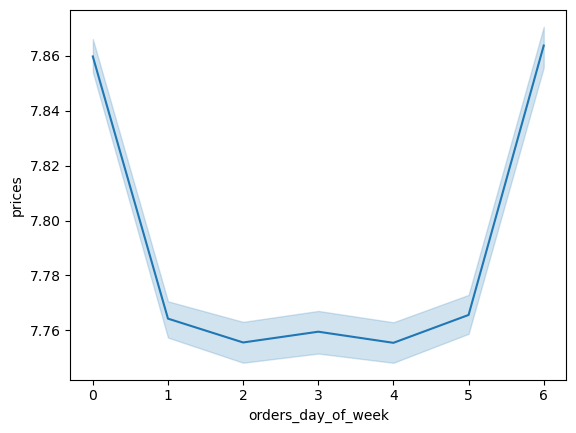

In [27]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')